## 결정트리

- 분류와 회귀 모두 가능한 지도 학습 모델
- Yes or No 질문들로 이어가며 학습
- 즉, 특정 질문에 따라 데이터를 구분하는 학습
- 한번의 분기 때 마다 두개로 구분
- 질문이나 정답의 네모 상자 : Node
- 맨 처음 분류 기준 : Root Node
- 맨 마지막 분류 기준 : Terminal / Leaf Node

## 결정 트리 프로세스

- 질문들을 기준으로 나눔
- 나뉜 범주에서 또 다시 질문들을 기준으로 나눔
(다만, 지나치게 나누면 오버피팅 가능성)  
    -> 이를 막기 위한 방법 : 가지치기
- 가지 치기 종류 : 사전 가지치기(pre-pruning), 사후 가지치기(post-pruning)
- 특성 중요도 : 트리를 만드는 결정에 각 특성이 얼마나 중요한지를 봄

## 결정 트리 장점

- 알고리즘이 직관적
- 룰이 매우 뚜렷하며, 규칙 노드와 리프 노드를 알기 쉽고 규칙 파악도 용이
- 전처리 같은 작업들이 덜 필요

## 의사 결정 나무 구현

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()

In [4]:
X = iris.data
y = iris.target

In [5]:
df = pd.DataFrame(X, columns = ['sepal_width(cm)', 'sepal_length(cm)', 'petal_width(cm)', 'petal_length(cm)'])

In [6]:
df.head()

,sepal_width(cm),sepal_length(cm),petal_width(cm),petal_length(cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
#test set과 train set 나누기

from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

#데이터 중에서 70%는 training data고 30%가 test data

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
clf = DecisionTreeClassifier()
#의사 결정 나무 생성

In [11]:
clf = clf.fit(X_train, y_train)
#의사 결정 나무를 훈련

In [12]:
y_pred = clf.predict(X_test)
#테스트 데이터 셋을 통해서 예측

In [13]:
from sklearn import metrics

In [14]:
print("Accuracy : ", metrics.accuracy_score(y_test, y_pred))
#모델의 정확도 분석

Accuracy :  0.9111111111111111


In [15]:
from sklearn.tree import export_graphviz
import pydotplus 
from IPython.display import Image

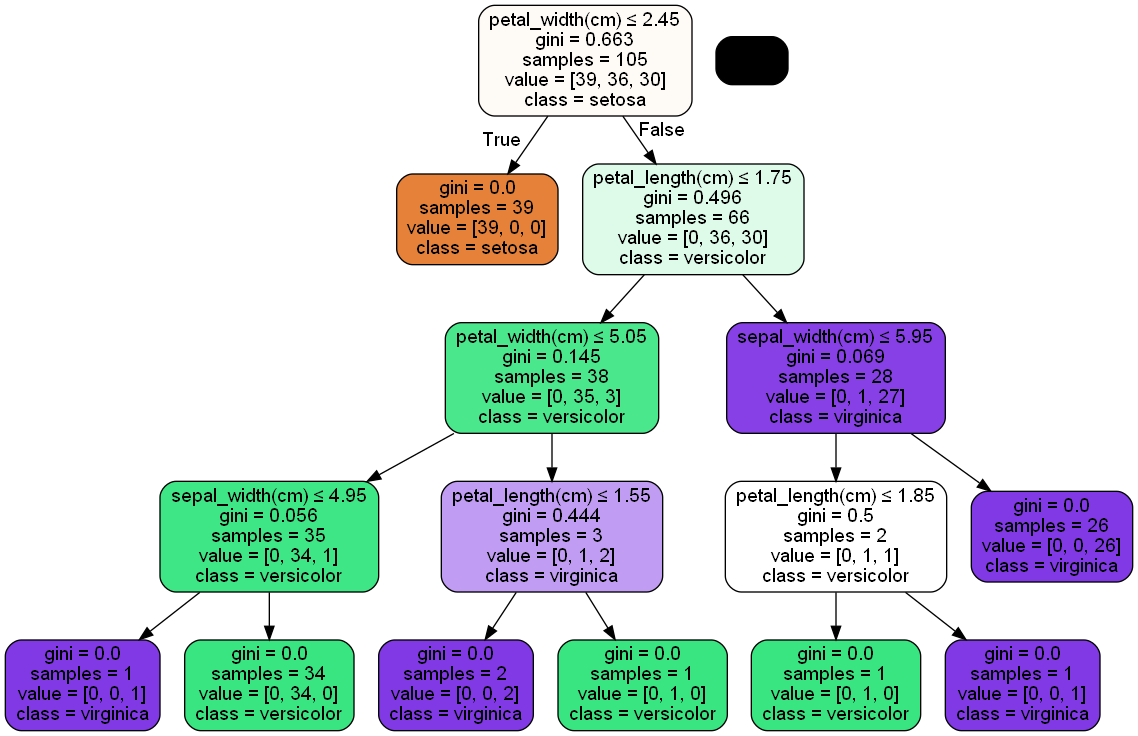

In [16]:
dot_data = export_graphviz(clf, out_file = None, feature_names = ['sepal_width(cm)', 'sepal_length(cm)', 'petal_width(cm)', 'petal_length(cm)'],
                          class_names = iris.target_names, filled = True, rounded = True, special_characters = True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

의사결정나무는 계산복잡성 대비 높은 예측 성능을 내는 것으로 정평이 나 있습니다. 아울러 변수 단위로 설명력을 지닌다는 강점을 가지고 있습니다. 다만 의사결정나무는 결정경계(decision boundary)가 데이터 축에 수직이어서 특정 데이터에만 잘 작동할 가능성이 높습니다.

이같은 문제를 극복하기 위해 등장한 모델이 바로 랜덤포레스트인데요, 같은 데이터에 대해 의사결정나무를 여러 개 만들어 그 결과를 종합해 예측 성능을 높이는 기법입니다.